# Nonlinar Regression Basics Using Premier League Transfer Data

### Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np

### Read the 1992-Present Premier League Transfer Data

In [19]:
df = pd.read_csv('../DataSets/Prem_Transfer_Data')

### Clean the Data to Replace €, m, k and Missing Data

In [22]:
df['Fee (€)'] = df['Fee'].copy()

df['Fee (€)'] = df['Fee (€)'].replace('free transfer', '0')
df['Fee (€)'] = df['Fee (€)'].replace('-', '0')
df['Fee (€)'] = df['Fee (€)'].replace('?', np.nan)
df['Fee (€)'] = df['Fee (€)'].str.replace('€', '') 
df['Fee (€)'] = df['Fee (€)'].str.replace('m', 'e6')
df['Fee (€)'] = df['Fee (€)'].str.replace('k', 'e3')

df['Fee (€)'] = pd.to_numeric(df['Fee (€)'], errors='coerce')

### Plot Initial Transfer Spend By Premier League Clubs


Text(0, 0.5, 'Mean Spend (€)')

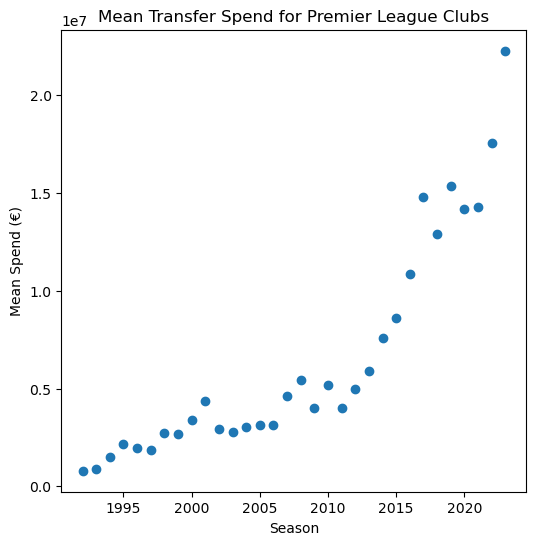

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
ax.set_title('Mean Transfer Spend for Premier League Clubs')
ax.set_xlabel('Season')
ax.set_ylabel('Mean Spend (€)')

### Create and Plot Linear Regression Model

Mean Squared Error (MSE): 6588878800731.736
R-Squared (R2): 0.7849730912956124


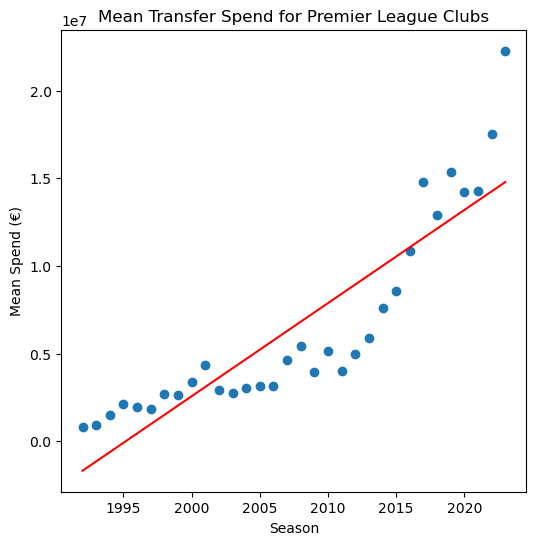

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
ax.plot(df['Year'].unique(), slope*df['Year'].unique()+intercept, color='red')
ax.set_title('Mean Transfer Spend for Premier League Clubs')
ax.set_xlabel('Season')
ax.set_ylabel('Mean Spend (€)')

mse = np.mean((df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean() - (slope*df['Year'].unique()+intercept)) ** 2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r_value**2}")

### Create Second Order Polynomial Function

In [10]:
def non_linear_model(x, a, b, c):
    return a * (x**2) + b * x + c

### Use curve_fit Function to Find Optimum a, b and c Parameters

In [39]:
params, covariance = curve_fit(non_linear_model, df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
a, b, c = params

### Generate the Line of Best Fit

In [40]:
y_curve = non_linear_model(df['Year'].unique(), a, b, c)

### Plot the Nonlinear Regression Model

Mean Squared Error (MSE): 2027145629467.213
R-Squared (R2): 0.9338444564878726


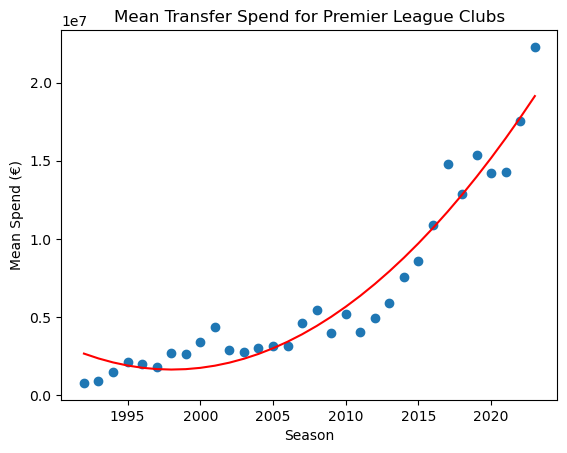

In [41]:
fig, ax = plt.subplots()
ax.scatter(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
ax.plot(df['Year'].unique(), y_curve, color='red')
ax.set_title('Mean Transfer Spend for Premier League Clubs')
ax.set_xlabel('Season')
ax.set_ylabel('Mean Spend (€)')

residuals = df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean() - y_curve
total_sum_of_squares = ((df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean() - np.mean(df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean()))**2).sum()
sum_of_squares_of_residuals = (residuals**2).sum()

r_squared = 1 - (sum_of_squares_of_residuals / total_sum_of_squares)

mse = mse = np.mean(residuals ** 2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r_squared}")

### Second Order Cost Function

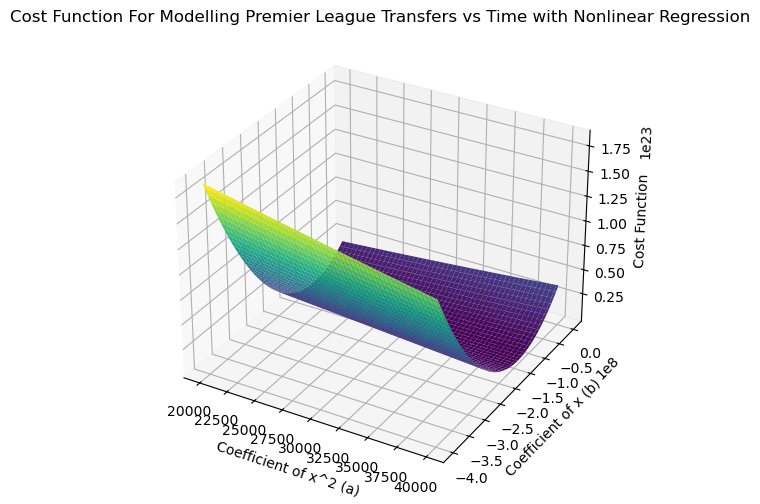

In [59]:
X = df['Year'].unique()
Y = df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean()

# Define the cost function
def cost_function(X, Y, c, b, a):
    m = len(X)
    predicted_values = c + b * X + a * X**2
    squared_errors = (predicted_values - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

# Create a grid of slope (a) and intercept (b) values
a_values = np.linspace(20000, 40000, 100)
b_values = np.linspace(0, -400000000, 100)
cost_values = np.zeros((len(b_values), len(a_values)))

for i, b in enumerate(b_values):
    for j, a in enumerate(a_values):
        cost_values[i, j] = cost_function(X, Y, 111989562520.77481
, b, a)

# Create a contour plot
a_grid, b_grid = np.meshgrid(a_values, b_values)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a_grid, b_grid, cost_values, cmap='viridis')
ax.set_xlabel('Coefficient of x^2 (a)')
ax.set_ylabel('Coefficient of x (b)')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function For Modelling Premier League Transfers vs Time with Nonlinear Regression')
plt.show()

In [50]:
def non_linear_model(x, a, b, c, d):
    return a * (x**3) + b * (x**2) + c*x + d

In [51]:
params, covariance = curve_fit(non_linear_model, df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
a, b, c, d = params

In [52]:
a, b, c, d

(1266.2518487692419,
 -7597948.609502462,
 15196902259.761255,
 -10132022192835.701)

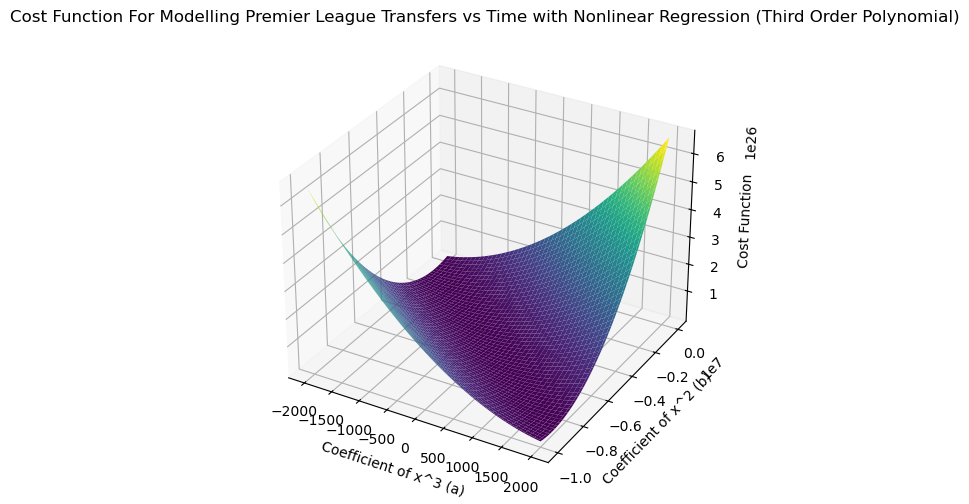

In [61]:
X = df['Year'].unique()
Y = df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean()

# Define the cost function
def cost_function(X, Y, d, c, b, a):
    m = len(X)
    predicted_values = d+ c*X + b * X**2 + a * X**3
    squared_errors = (predicted_values - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

# Create a grid of slope (a) and intercept (b) values
a_values = np.linspace(-2000, 2000, 100)
b_values = np.linspace(0, -10000000, 100)
cost_values = np.zeros((len(b_values), len(a_values)))

for i, b in enumerate(b_values):
    for j, a in enumerate(a_values):
        cost_values[i, j] = cost_function(X, Y, -10132022192835.701, 15196902259.761255
, b, a)

# Create a contour plot
a_grid, b_grid = np.meshgrid(a_values, b_values)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a_grid, b_grid, cost_values, cmap='viridis')
ax.set_xlabel('Coefficient of x^3 (a)')
ax.set_ylabel('Coefficient of x^2 (b)')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function For Modelling Premier League Transfers vs Time with Nonlinear Regression (Third Order Polynomial)')
plt.show()